Install TensorFlow and keras! You can do it by running the cell below:

If you get the following error:

ImportError: cannot import name np_utils

Then install np_utils package (pip3 install np_utils)

If you are using python2 maybe you have to install the packages with pip!

Run the cell below to import the required packages:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


def accuracy(Y,P):
    return np.count_nonzero(np.equal(np.argmax(Y,axis=-1),np.argmax(P,axis=-1)).astype(int))/float(Y.shape[0])

def visualize(data):
    p = data.reshape((28,28))
    plt.imshow(p,interpolation='none', cmap='gray_r')
    plt.show()

%matplotlib inline

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Dataset


The MNIST dataset contains handwritten digit, it has 60000 train image and 10000 test image. It's a commonly used dataset for training and testing machine learning models, because it contains real word examples, it's not that big, so it's fast to try out learning algorithms and experiment on this. The dataset is a subset of a larger database collected by National Institute of Standards and Technology (NIST) in the 90's. The purpose of collecting the dataset to create a database which can be used to create algorithms to be used in automatic ZIP code reader systems. The numbers in the training set was taken from American Census Bureau:
<img src="images/hwd_example.PNG" width="300px" />

The test set was collected from American high school students. Because train and test data comes from very different sources  it's not well suited for machine learning experiments. This was the reason for creating the MNIST (the images also was normalized to fit into 28x28 pixel and transformed to grayscale). In 2017 a larger dataset (EMNIST) was created from the original data containing 240000 training images and 40000 testing images. 

The cells below will load the data into a numpy matrices:

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))/255.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))/255.

In [6]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0:10])
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 784)
(10000,)


As you can see, the dataset have 60000 training images and 10000 test images.

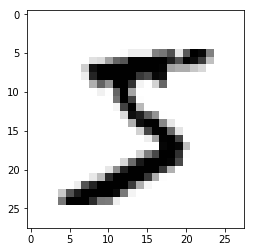

In [7]:
visualize(x_train[0])

The label is simply the number you can see on the picture:

In [8]:
y_train[0]

5

## Goal

The goal of this notebook is to implement neural networks in numpy and train it with gradient descent to recognize handwritten digits. 

The notebook contains 2 homeworks: 
* implementing the forward step of an L-layer neural network (due 03.06)
* implementing the backward step of an L-layer neural network, implementing the gradient descent and mini-batch gradient descent (due 03.13)


## One-hot encoding

The labels are discrete variables. To train a classifier we need to transform them to probabilities. This transformation is called one-hot encoding. It is defined as follows:

\begin{equation}
y\in \{0,1,2,...,K\}\longrightarrow y\in \{0,1\}^K \\
y=l \Longrightarrow y = [0, 0, \dots, 0]\;(K \mathrm{dimensional}),\; y_l = 1
\end{equation}

Implement this transformation:

In [9]:
#GRADED function
#Don't change the function name, parameters and return values
def one_hot(y):
    """
        Transforms labels to one-hot encoded labels.
        Input: 
            * y:   (M,)
        Output:
            * y_oh: (M, K)
    """
    y_oh = None
    ###Start code here
    
    # set y_oh to the one-hot encoded version of labels y
    y_oh=np.zeros(((y.shape[0]),10))
    i=int(0)
    for i in range(y.shape[0]):
        y_oh[i,int(y[i])]=1.
    ###End code here
    
    return y_oh

In [10]:
one_hot(y_train)[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

<b>Expected result:</b>
\begin{equation}
\begin{bmatrix}
0.&0.& 0.& 0.& 0.& 1.& 0.& 0.& 0.& 0.\\
1.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 0.&0.& 0.& 1.& 0.& 0.& 0.& 0.& 0.\\
0.& 1.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 1.\\
0.& 0.& 1.& 0.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 1.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 0.& 0.& 1.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 1.& 0.& 0.& 0.& 0.& 0.& 0.& 0.& 0.\\
0.& 0.& 0.& 0.& 1.& 0.& 0.& 0.& 0.& 0.
      \end{bmatrix}
       \end{equation}

<b>Transforming the whole dataset</b>:

In [11]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


# L layer neural network


Neural network can be described with the following computational graph:
<img src="images/NeuralNetworkForwardPass.png" />

This graph describes the forward propagation in the neural network. As you can see, every linear unit needs a $W$ matrix and a $b$ vector. First we need to initialize the weights of the networks. 


## Initializing the weights of an L layer network

As you can see above the computational graph also shows the dimensions of these objects. It's important to initialize the $W$
matrices to be random. To see this, imagine the following network:

<img src="images/simple_net.png" />

If we initialize the weights to zeros (or each neuron have the same weights), then the network will have the following symmetry: 
\begin{equation}
a^{[1]}_0=a^{[1]}_1
\end{equation}

So the two neurons in the first layer computes exactly the same function in the first step. When we calculate the derivatives with backpropagation, the gradient's will also reflect this symmetry:
\begin{equation}
\frac{\partial L}{\partial W^{[1]}_0}=\frac{\partial L}{\partial W^{[1]}_1}
\end{equation}

This means, that the weights of the first and second neuron will be the same for every iteration when we try to train the network with gradient descent ($W=W-\alpha\frac{\partial L}{\partial W}$). So in case of $n$ neuron, instead of $n$ neuron we will have just one, but we will do the single neuron computation $n$ times. To break this symmetry you need to initialize the $W$ matrices to be random. This will break the symmetry. The $b$ values can be set to zeros.

<b>Takeaway message: </b> to break the symmetry (every neuron in the layer computes the same) you need to initialize the weights matrices ($W$) to be random!


#### Multiplying with a small number


We also want the randomly initialized weight matrix to have small values. If the values of the weight matrix aren't small, then the output of the neuron won't be small either. Because after the linear unit we go trough some non-linearity, and in case of a sigmoid non-linearity it means we are in the flat part of the function:
<img src="images/sigmoid.PNG" />

If we are in the flat part as you can see in the plot, the derivative is pretty small. This means the change in the weight matrix will be very small, so the training will slow down. To avoid this, we multiply the weights with a small number, let's say with $0.01$.

In [12]:
#GRADED function
#Don't change the function name, parameters and return values
def initialize_weights(layer_dimensions):
    """
        Initialize the weights of the neural network.
        Input:
            * layer_dimensions: list containing the number of neurons for each layer. 
                                layer_dimensions[0] is the dimensionality of our data. 
                                layer_dimensions[1] is the number of neurons in the first layer.
        Output:
            * parameters: dict containing the weights of the network.
                          parameters["W1"] = the W weight matrix of the first layer
                          parameters["b1"] = the b bias node of the first layer
    """
    
    ###Start code here
    
    K=len(layer_dimensions)-1
    parameters={}
    i=int(0)
    Wstring=""; bstring=""
    for i in range(K):
        LD=[layer_dimensions[i],layer_dimensions[i+1]]
        Wstring="W"
        Wstring=Wstring+str(i+1)
        bstring="b"
        bstring=bstring+str(i+1)
        parameters[Wstring]=((np.random.rand((int(LD[1])),(int(LD[0]))))*0.01)
        parameters[bstring]=np.transpose([np.zeros(int(LD[1]))])
        
    # initialize the weights matrix W with small random numbers (multiply by 0.01), and b to zeros FOR ALL LAYERS!

    ###End code here
    return parameters

In [13]:
np.random.seed(0)
parameters = initialize_weights([3,6])
print("W1.shape=",parameters["W1"].shape)
print("b1.shape=",parameters["b1"].shape)
print("W1=",parameters["W1"])
print("b1=",parameters["b1"])

W1.shape= (6, 3)
b1.shape= (6, 1)
W1= [[0.00548814 0.00715189 0.00602763]
 [0.00544883 0.00423655 0.00645894]
 [0.00437587 0.00891773 0.00963663]
 [0.00383442 0.00791725 0.00528895]
 [0.00568045 0.00925597 0.00071036]
 [0.00087129 0.00020218 0.0083262 ]]
b1= [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


<b>Expected outpt:</b>

W1.shape= (6, 3)

b1.shape= (6, 1)

W1=\begin{equation}\begin{bmatrix} 0.01764052&  0.00400157& 0.00978738\\
  0.02240893&  0.01867558 &-0.00977278]\\
  0.00950088& -0.00151357& -0.00103219]\\
  0.00410599&  0.00144044 & 0.01454274]\\
  0.00761038 & 0.00121675&  0.00443863]\\
  0.00333674 & 0.01494079 &-0.00205158]]
 \end{bmatrix}
 \end{equation}
 
b1= \begin{equation}
\begin{bmatrix}0\\
 0.\\
 0.\\
 0.\\
 0.\\
 0.
 \end{bmatrix}
 \end{equation}

## Forward propagation in the network


To evaluate the network and make prediction, calculate the loss function you have to go trough the computational graph shown above. As you can see the graph contains modules. To implement the whole calculation you need to implement these simple modules, step by step.


### Linear step


The first module is the linear unit. The calculation is illustrated in the following graph:
<img src="images/nn_linear.png" />

In [14]:
#GRADED function
#Don't change the function name, parameters and return values
def linear_forward(W, b, a_prev):
    """
        Linear unit in the computational graph.
        Inputs:
                * W: the weight matrix of the unit (dimensions in the graph above)
                * b: the bias vector of the unit (dimensions in the graph above)
                * a_prev: the activation from the previous node (dimensions in the graph above)
        Outputs:
                * Z:     the result (dimensions in the graph above)
                * cache: combination of values you will need in backward passes
    """
    ###Start code here
    
    # Calculate Z
    Z=(np.dot(W,a_prev))
    i=int(0)
    j=int(0)
    while(i<Z.shape[0]):
        while(j<Z.shape[1]):
            Z[i][j]=Z[i][j]+b[i]
            j+=1
        i+=1
    # Create a cache for backpropagation, suggestion: (Z, W, a_prev)
    cache = (Z, W, a_prev)
    
    ###End code here
    return Z, cache

In [15]:
np.random.seed(0)
parameters = initialize_weights([3,2])
x = np.random.randn(1,3).T
Z, cache = linear_forward(parameters["W1"],parameters["b1"],x)
print(Z)

[[0.00350956]
 [0.00386896]]


<b>Expected output</b>
\begin{equation}
\begin{bmatrix}0.01514415\\
 0.01947252
    \end{bmatrix}
\end{equation}

### Non-linear step

After we calculated the linear node, the result of this will go trough some non-linearity. This is shown in the graph below:

<img src="images/nn_nonlinear.png" />

We choose the $g$ function to be sigmoid function in this case. Implement this function. The sigmoid function:
$f(x)=\frac{1}{1+e^{-x}}$

In [16]:
#GRADED function
#Don't change the function name, parameters and return values
def activation_forward(Z):
    """
        Activation node on the forward computational graph.
        Inputs:
                Z: the ouput of linear unit
        Outputs:
                a: the activation
    """
    ###Start code here
   
    #implement sigmoid activation
    a = 1/(1+np.exp(-Z))

    ###End code here
    return a

In [17]:
np.random.seed(0)
Z = np.random.randn(2,3)
activation_forward(Z)

array([[0.85371646, 0.59872543, 0.72685773],
       [0.9038621 , 0.86617546, 0.27343225]])

<b>Expected output:</b>

\begin{equation}
\begin{bmatrix}
0.85371646& 0.59872543& 0.72685773\\
       0.9038621 & 0.86617546& 0.27343225
       \end{bmatrix}
       \end{equation}

### Softmax step

The last part of the computational graph is a softmax unit.

<img src="images/nn_softmax.png" />

Implement the function shown in the graph.

In [18]:
#GRADED function
#Don't change the function name, parameters and return values
def softmax(Z):
    """
        Calculates the softmax of a matrix.
        Input: 
            * Z: (M,K)=(num_examples, num_categories)
        Returns:
            * a: (M,K)=(num_examples, num_categories)
    """
    ###Start code here
    
    # Transform Z to probabilites
    # The sum should be on categories!
    a = np.zeros((int(Z.shape[0]),int(Z.shape[1])))
    i=int(0)
    for i in range(int(Z.shape[0])):
        j=int(0)
        for j in range(int(Z.shape[1])):
            N=0.
            k=int(0)
            for k in range(int(Z.shape[1])):
                N=N+np.exp(Z[i][k])
            a[i][j]=(np.exp(Z[i][j]))/N
    
    ###End code here
    return a

In [19]:
np.random.seed(0)
Z = np.random.randn(2,3)
softmax(Z)

array([[0.58423523, 0.14936733, 0.26639744],
       [0.57854881, 0.39829292, 0.02315827]])

<b>Expected output:</b>

\begin{equation}
\begin{bmatrix}
0.58423523& 0.14936733& 0.26639744\\
0.57854881& 0.39829292& 0.02315827
\end{bmatrix}
\end{equation}

### Full network forward step

Congratulations, you implemented all the units of a the computational graph. Now your job is to implement the full network using the units you implemented! So the computation you have to do can be shown with the following computational graph:

<img src="images/nn_forward.png" />

Implement this calculation!

<b>REMEMBER: use the units you implemented above (function calls).<b/>

In [20]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_forward(parameters, X):
    """
        Calculates a forward step in the network.
        Input:
            * parameters: dict of parameters.
                          parameters["W1"]= the W matrix of first layer
                          parameters["b4"]=the bias vector in layer 4
            * X: input matrix. Shape (M,K)
    """
    caches = []
    L = len(parameters)//2
    
    ###Start code here
    
    # Set a_prev to the input!
    # In the first node of the computational graph, the input is transposed!
    a = X.T
    i=int(0)
    wSTRING=""; bSTRING=""
    for i in range(L-1):
        wSTRING="W"
        wSTRING=wSTRING+str(i+1)
        bSTRING="b"
        bSTRING=bSTRING+str(i+1)
        W=parameters[wSTRING]
        b=parameters[bSTRING]
        Z, cache=linear_forward(W, b, a)
        caches.append(cache)
        a=activation_forward(Z)
    wSTRING="W"
    wSTRING=wSTRING+str(L)
    bSTRING="b"
    bSTRING=bSTRING+str(L)
    W=parameters[wSTRING]
    b=parameters[bSTRING]
    Z, cache=linear_forward(W, b, a)
    caches.append(cache)
    Z=Z.T
    a=softmax(Z)
    
    
    # Go trough the nodes of the computational graph, from LEFT to RIGHT
    # Always use as the input of current node the ouput of previous node!
    # Get the W, b weights from the parameters dictionary
    # use linear_forward and activation_forward function to step one in the layer
    # append the linear unit's cache to caches list
    
    # Important: the last layer activation should be softmax! 
    # Important: Transpose Z (in the last unit)

   
        

    ###End code here
    
    return (a,caches)

In [21]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
print(AL)

[[0.50058344 0.49941656]
 [0.50058224 0.49941776]]


<b>Expected output:</b>
\begin{equation}
\begin{bmatrix}
0.49970579& 0.50029421\\
0.49971335& 0.50028665
\end{bmatrix}
\end{equation}


HOMEWORK 1 END
<hr style="height:3px" />

## Loss function


To calculate the loss function you have to implement the computation in the following graph:
<img src="images/nn_loss.png" />

In [22]:
#GRADED function
#Don't change the function name, parameters and return values
def crossentropy(P, Y):
    """
        Calculates the crossentropy-loss shown in the computational graph above.
        Inputs:
                * P the prediction of the network (dimensions above)
                * Y the one-hot encoded labels
        Outputs:
                * The crossentropy between the P and Y
    """
    ### Start code here
   
    #calculate the coross entropy loss
    loss = 0.
    i=int(0)
    j=int(0)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            loss=loss+((Y[i][j])*(np.log(P[i][j])))
    loss=(-1/(P.shape[0]))*loss
    ### End code here
    return loss

In [23]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0]]))
crossentropy(AL,y)

0.6931490633035144

<b>Expected output:</b>

0.6931397896985225

## Backward propagation in the network


Congratulations! You implemented a whole L layer neural network for classification problems! 

In the next step you will implement backpropagation to be able to train the network.

In the forward propagation you go trough a computational graph from left to right. In the backpropagation you go trough a computational graph from right to left. 

The computational graph of the backpropagation in $L$ layer neural network is the following.

<img src="images/NeuralNetworkBackwardPassV3.png" />

To implement this, you will firs implement the different units this calculation needs.

### Backpropagation trough non-linearity

### Loss and softmax step (last node on the graph)


Because we go trough on the graph from the right to the left the first node is the $\frac{\partial L}{\partial Z^{[L]}}$ unit.  When we use softmax activation and cross entropy functions the derivate will be simple in the top of the network. Implement this calculation as shown in the computational graph:
<img src="images/nn_softloss_backward.png" />

In [24]:
#GRADED function
#Don't change the function name, parameters and return values
def losssoftmax_backward(P,Y):
    """
        Calculates the dLdZ derivate which is in the top of the network. 
        Inputs:
                * P the prediction of the network
                * Y the labels
        Outputs:
                * dLdZ the derivate of the L loss function 
    """
    ###Start code here
    
    #implement the calculation shown in the graph
    dLdZ = (-1/(Y.shape[0]))*((Y-P).T)
    
    ###End code here
    return dLdZ

In [25]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

losssoftmax_backward(AL,y)

array([[ 0.16686115, -0.16647259, -0.16647237],
       [-0.16686115,  0.16647259,  0.16647237]])

<b>Expected output:</b>
\begin{equation}
\begin{bmatrix}
0.1665686 & -0.16676222& -0.16677319\\
       -0.1665686&  0.16676222&  0.16677319
\end{bmatrix}
\end{equation}

### General non-linear backward step in the network

Implement a backward step on non-linearity in the model.  This computation is shown in the following graph:

<img src="images/nn_nonlin_backward.png" />

In [26]:
#GRADED function
#Don't change the function name, parameters and return values
def activation_backward(dLda, cache):
    """
        Calculates the backward step in a non-linearity.
        Inputs:
            * dLda: The derivates above the current unit.
            * cache: The cache from the forward step.
    """
    
    ###Start code here
    
    # Use the cache from the foward step
    # Calculate the g'(Z): the sigmoid derivate (the derivate is: sigmoid(Z)*(1-sigmoid(Z)) )
    # Do the calculation shown in the graph.
    Z=cache[0]
    dLdZ = np.zeros((dLda.shape[0],dLda.shape[1]))
    i=int(0)
    j=int(0)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            dLdZ[i][j]=(dLda[i][j])*(1/(1+np.exp(-(Z[i][j]))))*(1-(1/(1+np.exp(-(Z[i][j])))))
            
    ###End code here
    return dLdZ

In [27]:
np.random.seed(1)
Z      = np.random.randn(4,2)
W      = np.random.randn(4,3)
a_prev = np.random.randn(3,2)
dLda   = np.random.randn(4,2)
    

dLdZ = activation_backward(dLda, (Z, W, a_prev))

dLdZ

array([[-0.01689878, -0.2133506 ],
       [-0.06251018,  0.10071241],
       [-0.14419048, -0.03281763],
       [-0.08698937, -0.18342292]])

<b>Expected output:</b>
\begin{equation}
\begin{bmatrix}
-0.01689878&-0.2133506 \\
       -0.06251018& 0.10071241\\
       -0.14419048& -0.03281763\\
       -0.08698937& -0.18342292
\end{bmatrix}
\end{equation}

### Backpropagation trough linear unit


Implement the backpropagation trough a linear unit. This calculation is shown as the following graph:

<img src="images/nn_linear_backward.png" />

In [28]:
#GRADED function
#Don't change the function name, parameters and return values
def linear_backward(dLdZ, cache):
    """
        Implements the backward step on linear unit as shown in the graph above/
        Inputs: 
                * dLdZ:  the derivate from the next node
                * cache: the cache form froward step
        Returns:
                * dLda
                * dLdW
                * dLdb
    """
    
    ###Start code here
    
    # Use the cache from the forward step
    #Calculate dLda as shown in the graph
    dLda = np.dot(cache[1].T,dLdZ)
    #Calculate the dLdW shown in the graph
    dLdW = np.dot(dLdZ,cache[2].T)
    #Calculate the dLdb shown in the graph
    # Use keepdims=True
    dLdb = np.zeros((dLdZ.shape[0]))
    i=int(0)
    j=int(0)
    for i in range(dLdZ.shape[0]):
        for j in range(dLdZ.shape[1]):
            dLdb[i]=dLdb[i]+dLdZ[i][j]
    ###End code here
    
    return (dLda, dLdW, dLdb)

In [29]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(3,3)
AL, cache = nn_forward(parameters, x)
y = np.array(([[0,1],[1,0],[1,0]]))

dLdZ=losssoftmax_backward(AL,y)

dLda, dLdW, dLdb = linear_backward(dLdZ, cache[-1])
print("dLda=",dLda)
print("dLdW=",dLdW)
print("dLdb=",dLdb)

dLda= [[-0.00035049  0.0003512   0.0003512 ]
 [-0.00032177  0.00032242  0.00032242]]
dLdW= [[-0.08373565 -0.08335878]
 [ 0.08373565  0.08335878]]
dLdb= [-0.16717182  0.16717182]


<b>Expected output</b>

 \begin{equation}dLda= \begin{bmatrix}0.00238152&-0.00237077& -0.00237088\\
 -0.00085494 & 0.00085108 & 0.00085112
 \end{bmatrix}
 \end{equation}
 \begin{equation}dLdW=\begin{bmatrix}-0.08456424&-0.08032504\\
 0.08456424 & 0.08032504\\
 \end{bmatrix}\end{equation}
 \begin{equation}dLdb=\begin{bmatrix}-0.16553337 \\ 0.16553337\end{bmatrix}\end{equation}

### Backpropagation trough the network


Using the units you already implemented, implement the full backward pass trough the network as shown in the following graph:

<img src="images/NeuralNetworkBackwardPassV3.png" />


In [30]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_backward(X, Y, P, caches):
    """
        Calculates the backward pass for the network as shown in the computational graph above.
        Inputs:
                * X: The input examples: (M,N) = (number_of_examples, dimensionality_of_data)
                * Y: The one-hot encoded labels: (M,K) = (number_of_examples, number_of_categories)
                * P: The network prediction: (M,K)
                * caches: the cache from forward step
        Returns:
                * derivates: dictionary containing all the derivates
                             derivates["dLdW2"] = the derivate of the loss L regarding to the weight matrix W of 2. layer
    """
    derivates = {}
    ###Start code here
    
    # Implement the calculation shown in the graph!
    # The arrows in the graph: the output of a unit is the input of the previous unit
    # IMPORTANT: you have to go trough the graph from RIGHT to LEFT
    
    # The last node derivative (loss) initializes the calculation by setting the derivative in the top of the network
    
    
    # compute the backward pass on non-linearity (use the function you implemented)
    # compute the backward pass on linear unit (use the function you implemented)
    # save the derivates to the derivates dict
    # derivates["dLdW2"] = the derivate of the loss L regarding to the weight matrix W of 2. layer
    
    #1
    dLdZ=losssoftmax_backward(P,Y)
    
    #2
    dLdastring=""; dLdWstring=""; dLdbstring=""
    i=int(len(caches)-1)
    while (i>0):
        cache=caches[i]
        dLda, dLdW, dLdb = linear_backward(dLdZ, cache)
        dLdastring="dLda"
        dLdastring=dLdastring+str(i+1)
        derivates[dLdastring]=dLda
        dLdWstring="dLdW"
        dLdWstring=dLdWstring+str(i+1)
        derivates[dLdWstring]=dLdW
        dLdbstring="dLdb"
        dLdbstring=dLdbstring+str(i+1)
        derivates[dLdbstring]=dLdb
        dLdZ=activation_backward(dLda, cache)
        i-=1
    
    #3
    dLdW=np.dot(dLdZ,X)
    dLdb = np.zeros((dLdZ.shape[0]))
    i=int(0)
    j=int(0)
    for i in range(dLdZ.shape[0]):
        for j in range(dLdZ.shape[1]):
            dLdb[i]=dLdb[i]+dLdZ[i][j]
    derivates["dLdW1"]=dLdW
    derivates["dLdb1"]=dLdb
    
    ###End code here
    return derivates

In [31]:
np.random.seed(1)
parameters = initialize_weights([3,2,2])
x = np.random.randn(4,3)
y = (np.random.randn(4,2)>0.5).astype(int)
AL, caches = nn_forward(parameters, x)

nn_backward(x,y, AL, caches)
print(nn_backward(x,y, AL, caches)["dLdW1"])

[[-1.11981537e-04  1.25323325e-05 -1.49879840e-04]
 [-6.76276972e-05  5.34064858e-05 -2.61293453e-04]]


\begin{equation}
dLdW1 = \begin{bmatrix}
    -6.21632506e-04& -2.36318550e-04&  1.23490272e-03\\
     3.61013616e-04& -1.50058030e-05& -4.73913042e-04
     \end{bmatrix}
\end{equation}
     \begin{equation}
     dLdW2=\begin{bmatrix}
  0.00113032&  0.00250435\\
       0.00110121& -0.00371535
       \end{bmatrix}
       \end{equation}
 \begin{equation}
 dLdb1=\begin{bmatrix}4.25433282e-06& -1.48633758e-06
 \end{bmatrix}\end{equation}
 \begin{equation}
 dLdb2=\begin{bmatrix} 0.00112994&-0.00112994\end{bmatrix}\end{equation}

## Training the network

Congratulation! You implemented the forward and backward calculation of a neural network. Training a network now it's very easy.

### Gradient descent

First, let's implement gradient descent for neural networks. The gradient descent finds the weights of the network using the following algorithm:

```pseudo
for every W,b:
    W = random(W_shape)
    b = random(b_shape)
repeat{
    for every W,b:
        dLdW, dLdb = get_derivatives(X,Y, W, b)
        W = W - alpha * dLdW
        b = b - alpha * dLdb
}
```

In [42]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_train_gd(X, Y, layers, n_iter=1000, lr=0.01):
    """
        Creates and trains a neural network with gradient descent.
        Inputs:
                * X: the images (number_of_examples, 28*28)
                * Y: the labels (number_of_examples, 10)
                * layers: the definition of neural networks
                          [28*28, 100, 10]: two layers, 100 neuron in first layer, and 10 neurons in the last layer
                          the first element of this list must be 28*28
                          the number of neurons in the last layer must be the same as Y.shape[1]
                * n_iter: how many iteration we want with gradient descent
                * lr:     learning rate
        Returns:
                * parameters: the trained parameters of the network
                * losses:     the loss values
    """
    
    L = len(layers)
    losses = []
    
    ###Start code here
    
    #initialize the weights of the network
    parameters = initialize_weights(layers)
        
    # In one iteration of gradient descent:
    i=int(0)
    for i in range(n_iter):
        
        # Do a forward step in the network. Use nn_forward
        P, caches=nn_forward(parameters, X)
        
        
        # Calculate the derivates doing a backward step in the network. Use nn_backward
        derivatives=nn_backward(X, Y, P, caches)
        
        # Update the weights
        Wstring=""; bstring=""
        dLdWstring=""; dLdbstring=""
        j=int(1)
        while(j<L):
            Wstring="W"; bstring="b"
            dLdWstring="dLdW"; dLdbstring="dLdb"
            Wstring=Wstring+str(j)
            bstring=bstring+str(j)
            dLdWstring=dLdWstring+str(j)
            dLdbstring=dLdbstring+str(j)
            parameters[Wstring]=parameters[Wstring]-(lr*derivatives[dLdWstring])
            k=int(0)
            l=int(0)
            while(k<int(parameters[bstring].shape[0])):
                while(l<int(parameters[bstring].shape[1])):
                    parameters[bstring][k][l]=parameters[bstring][k][l]-(lr*(derivatives[dLdbstring][k]))
                    l+=1
                k+=1
            j+=1
        
        # Calculate the loss. Use crossentropy. (and save it to losses)
        loss=crossentropy(P, Y)
        losses.append(loss)
   

    ###End code here
    return parameters,losses

In [43]:
# This will take a while
parameters,losses = nn_train_gd(x_train, y_train_oh, [28*28, 100, 10], n_iter=3, lr=0.01)

In [44]:
P, _ = nn_forward(parameters, x_train)

In [45]:
accuracy(y_train_oh, P)

0.09825

### Mini-batch gradient descent

As you can see above, taking one step with gradient descent takes a lot of time, even with this smaller dataset (60k images). In deep learning instead of gradient descent we use mini-batch gradient descent or some more modern version of it. 

In mini-batch gradient descent we don't use the whole dataset in every iteration, instead we use a smaller sample (mini-batch). We iterate trough the dataset with these mini-batches, calculate the derivatives using these mini-batches and do a gradient descent step. After we went trough the dataset (we completed one epoch) we repeat the process for some epochs.

So the mini-batch gradient descent algorithm is the following:
```pseudo
for every W,b:
    W = random(W_shape)
    b = random(b_shape)
repeat{
    for mini_batch_X, mini_batch_Y from X,Y:
        for every W,b:
            dLdW, dLdb = get_derivatives(mini_batch_X, mini_batch_Y, W,b)
            W = W - alpha * dLdW
            b = b - alpha * dLdb
}
```

In [32]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_train_sgd(X, Y, layers, batch_size=100, epochs=20, lr=0.01):
    """
        Creates and trains a neural network with gradient descent.
        Inputs:
                * X: the images (number_of_examples, 28*28)
                * Y: the labels (number_of_examples, 10)
                * layers: the definition of neural networks
                          [28*28, 100, 10]: two layers, 100 neuron in first layer, and 10 neurons in the last layer
                          the first element of this list must be 28*28
                          the number of neurons in the last layer must be the same as Y.shape[1]
                * n_iter: how many iteration we want
                * lr:     learning rate
        Returns:
                * parameters: the trained parameters of the network
                * losses:     the loss values
    """
    
    L = len(layers)
    losses = []
    
    ###Start code here
    
    #initialize the weights of the network
    parameters = initialize_weights(layers)
     
    # Iterate trough epochs
    i=int(0)
    for i in range(epochs):
        # Iterate trough batches in dataset
        I=int(1)
        while(I<X.shape[0]/batch_size):
            mini_batch_X=X[(I-1)*batch_size:I*batch_size]
            mini_batch_Y=Y[(I-1)*batch_size:I*batch_size]
          # Do a forward step in the network. Just with the mini-batch! Use nn_forward
            P, caches=nn_forward(parameters, mini_batch_X)
          # Calculate the derivates doing a backward step in the network. Just for the mini-batch! Use nn_backward
            derivatives=nn_backward(mini_batch_X, mini_batch_Y, P, caches)
          # Update the weights
            Wstring=""; bstring=""
            dLdWstring=""; dLdbstring=""
            j=int(1)
            while(j<L):
                Wstring="W"; bstring="b"
                dLdWstring="dLdW"; dLdbstring="dLdb"
                Wstring=Wstring+str(j)
                bstring=bstring+str(j)
                dLdWstring=dLdWstring+str(j)
                dLdbstring=dLdbstring+str(j)
                parameters[Wstring]=parameters[Wstring]-(lr*derivatives[dLdWstring])
                k=int(0)
                l=int(0)
                while(k<int(parameters[bstring].shape[0])):
                    while(l<int(parameters[bstring].shape[1])):
                        parameters[bstring][k][l]=parameters[bstring][k][l]-(lr*(derivatives[dLdbstring][k]))
                        l+=1
                    k+=1
                j+=1
            print(i, "\t", I)
            I+=1
        #print(i)
        loss=crossentropy(P, mini_batch_Y)
        losses.append(loss)
       # Calculate the loss. Use crossentropy. Save to losses.



    ###End code here
    return parameters,losses

In [33]:
parameters,losses = nn_train_sgd(x_train, y_train_oh, [28*28, 100, 10], batch_size=100, epochs=30, lr=0.01)

0 	 1
0 	 2
0 	 3
0 	 4
0 	 5
0 	 6
0 	 7
0 	 8
0 	 9
0 	 10
0 	 11
0 	 12
0 	 13
0 	 14
0 	 15
0 	 16
0 	 17
0 	 18
0 	 19
0 	 20
0 	 21
0 	 22
0 	 23
0 	 24
0 	 25
0 	 26
0 	 27
0 	 28
0 	 29
0 	 30
0 	 31
0 	 32
0 	 33
0 	 34
0 	 35
0 	 36
0 	 37
0 	 38
0 	 39
0 	 40
0 	 41
0 	 42
0 	 43
0 	 44
0 	 45
0 	 46
0 	 47
0 	 48
0 	 49
0 	 50
0 	 51
0 	 52
0 	 53
0 	 54
0 	 55
0 	 56
0 	 57
0 	 58
0 	 59
0 	 60
0 	 61
0 	 62
0 	 63
0 	 64
0 	 65
0 	 66
0 	 67
0 	 68
0 	 69
0 	 70
0 	 71
0 	 72
0 	 73
0 	 74
0 	 75
0 	 76
0 	 77
0 	 78
0 	 79
0 	 80
0 	 81
0 	 82
0 	 83
0 	 84
0 	 85
0 	 86
0 	 87
0 	 88
0 	 89
0 	 90
0 	 91
0 	 92
0 	 93
0 	 94
0 	 95
0 	 96
0 	 97
0 	 98
0 	 99
0 	 100
0 	 101
0 	 102
0 	 103
0 	 104
0 	 105
0 	 106
0 	 107
0 	 108
0 	 109
0 	 110
0 	 111
0 	 112
0 	 113
0 	 114
0 	 115
0 	 116
0 	 117
0 	 118
0 	 119
0 	 120
0 	 121
0 	 122
0 	 123
0 	 124
0 	 125
0 	 126
0 	 127
0 	 128
0 	 129
0 	 130
0 	 131
0 	 132
0 	 133
0 	 134
0 	 135
0 	 136
0 	 137
0 	 138
0 	 

1 	 455
1 	 456
1 	 457
1 	 458
1 	 459
1 	 460
1 	 461
1 	 462
1 	 463
1 	 464
1 	 465
1 	 466
1 	 467
1 	 468
1 	 469
1 	 470
1 	 471
1 	 472
1 	 473
1 	 474
1 	 475
1 	 476
1 	 477
1 	 478
1 	 479
1 	 480
1 	 481
1 	 482
1 	 483
1 	 484
1 	 485
1 	 486
1 	 487
1 	 488
1 	 489
1 	 490
1 	 491
1 	 492
1 	 493
1 	 494
1 	 495
1 	 496
1 	 497
1 	 498
1 	 499
1 	 500
1 	 501
1 	 502
1 	 503
1 	 504
1 	 505
1 	 506
1 	 507
1 	 508
1 	 509
1 	 510
1 	 511
1 	 512
1 	 513
1 	 514
1 	 515
1 	 516
1 	 517
1 	 518
1 	 519
1 	 520
1 	 521
1 	 522
1 	 523
1 	 524
1 	 525
1 	 526
1 	 527
1 	 528
1 	 529
1 	 530
1 	 531
1 	 532
1 	 533
1 	 534
1 	 535
1 	 536
1 	 537
1 	 538
1 	 539
1 	 540
1 	 541
1 	 542
1 	 543
1 	 544
1 	 545
1 	 546
1 	 547
1 	 548
1 	 549
1 	 550
1 	 551
1 	 552
1 	 553
1 	 554
1 	 555
1 	 556
1 	 557
1 	 558
1 	 559
1 	 560
1 	 561
1 	 562
1 	 563
1 	 564
1 	 565
1 	 566
1 	 567
1 	 568
1 	 569
1 	 570
1 	 571
1 	 572
1 	 573
1 	 574
1 	 575
1 	 576
1 	 577
1 	 578
1 	 579


3 	 309
3 	 310
3 	 311
3 	 312
3 	 313
3 	 314
3 	 315
3 	 316
3 	 317
3 	 318
3 	 319
3 	 320
3 	 321
3 	 322
3 	 323
3 	 324
3 	 325
3 	 326
3 	 327
3 	 328
3 	 329
3 	 330
3 	 331
3 	 332
3 	 333
3 	 334
3 	 335
3 	 336
3 	 337
3 	 338
3 	 339
3 	 340
3 	 341
3 	 342
3 	 343
3 	 344
3 	 345
3 	 346
3 	 347
3 	 348
3 	 349
3 	 350
3 	 351
3 	 352
3 	 353
3 	 354
3 	 355
3 	 356
3 	 357
3 	 358
3 	 359
3 	 360
3 	 361
3 	 362
3 	 363
3 	 364
3 	 365
3 	 366
3 	 367
3 	 368
3 	 369
3 	 370
3 	 371
3 	 372
3 	 373
3 	 374
3 	 375
3 	 376
3 	 377
3 	 378
3 	 379
3 	 380
3 	 381
3 	 382
3 	 383
3 	 384
3 	 385
3 	 386
3 	 387
3 	 388
3 	 389
3 	 390
3 	 391
3 	 392
3 	 393
3 	 394
3 	 395
3 	 396
3 	 397
3 	 398
3 	 399
3 	 400
3 	 401
3 	 402
3 	 403
3 	 404
3 	 405
3 	 406
3 	 407
3 	 408
3 	 409
3 	 410
3 	 411
3 	 412
3 	 413
3 	 414
3 	 415
3 	 416
3 	 417
3 	 418
3 	 419
3 	 420
3 	 421
3 	 422
3 	 423
3 	 424
3 	 425
3 	 426
3 	 427
3 	 428
3 	 429
3 	 430
3 	 431
3 	 432
3 	 433


5 	 163
5 	 164
5 	 165
5 	 166
5 	 167
5 	 168
5 	 169
5 	 170
5 	 171
5 	 172
5 	 173
5 	 174
5 	 175
5 	 176
5 	 177
5 	 178
5 	 179
5 	 180
5 	 181
5 	 182
5 	 183
5 	 184
5 	 185
5 	 186
5 	 187
5 	 188
5 	 189
5 	 190
5 	 191
5 	 192
5 	 193
5 	 194
5 	 195
5 	 196
5 	 197
5 	 198
5 	 199
5 	 200
5 	 201
5 	 202
5 	 203
5 	 204
5 	 205
5 	 206
5 	 207
5 	 208
5 	 209
5 	 210
5 	 211
5 	 212
5 	 213
5 	 214
5 	 215
5 	 216
5 	 217
5 	 218
5 	 219
5 	 220
5 	 221
5 	 222
5 	 223
5 	 224
5 	 225
5 	 226
5 	 227
5 	 228
5 	 229
5 	 230
5 	 231
5 	 232
5 	 233
5 	 234
5 	 235
5 	 236
5 	 237
5 	 238
5 	 239
5 	 240
5 	 241
5 	 242
5 	 243
5 	 244
5 	 245
5 	 246
5 	 247
5 	 248
5 	 249
5 	 250
5 	 251
5 	 252
5 	 253
5 	 254
5 	 255
5 	 256
5 	 257
5 	 258
5 	 259
5 	 260
5 	 261
5 	 262
5 	 263
5 	 264
5 	 265
5 	 266
5 	 267
5 	 268
5 	 269
5 	 270
5 	 271
5 	 272
5 	 273
5 	 274
5 	 275
5 	 276
5 	 277
5 	 278
5 	 279
5 	 280
5 	 281
5 	 282
5 	 283
5 	 284
5 	 285
5 	 286
5 	 287


7 	 5
7 	 6
7 	 7
7 	 8
7 	 9
7 	 10
7 	 11
7 	 12
7 	 13
7 	 14
7 	 15
7 	 16
7 	 17
7 	 18
7 	 19
7 	 20
7 	 21
7 	 22
7 	 23
7 	 24
7 	 25
7 	 26
7 	 27
7 	 28
7 	 29
7 	 30
7 	 31
7 	 32
7 	 33
7 	 34
7 	 35
7 	 36
7 	 37
7 	 38
7 	 39
7 	 40
7 	 41
7 	 42
7 	 43
7 	 44
7 	 45
7 	 46
7 	 47
7 	 48
7 	 49
7 	 50
7 	 51
7 	 52
7 	 53
7 	 54
7 	 55
7 	 56
7 	 57
7 	 58
7 	 59
7 	 60
7 	 61
7 	 62
7 	 63
7 	 64
7 	 65
7 	 66
7 	 67
7 	 68
7 	 69
7 	 70
7 	 71
7 	 72
7 	 73
7 	 74
7 	 75
7 	 76
7 	 77
7 	 78
7 	 79
7 	 80
7 	 81
7 	 82
7 	 83
7 	 84
7 	 85
7 	 86
7 	 87
7 	 88
7 	 89
7 	 90
7 	 91
7 	 92
7 	 93
7 	 94
7 	 95
7 	 96
7 	 97
7 	 98
7 	 99
7 	 100
7 	 101
7 	 102
7 	 103
7 	 104
7 	 105
7 	 106
7 	 107
7 	 108
7 	 109
7 	 110
7 	 111
7 	 112
7 	 113
7 	 114
7 	 115
7 	 116
7 	 117
7 	 118
7 	 119
7 	 120
7 	 121
7 	 122
7 	 123
7 	 124
7 	 125
7 	 126
7 	 127
7 	 128
7 	 129
7 	 130
7 	 131
7 	 132
7 	 133
7 	 134
7 	 135
7 	 136
7 	 137
7 	 138
7 	 139
7 	 140
7 	 141
7 	 

8 	 458
8 	 459
8 	 460
8 	 461
8 	 462
8 	 463
8 	 464
8 	 465
8 	 466
8 	 467
8 	 468
8 	 469
8 	 470
8 	 471
8 	 472
8 	 473
8 	 474
8 	 475
8 	 476
8 	 477
8 	 478
8 	 479
8 	 480
8 	 481
8 	 482
8 	 483
8 	 484
8 	 485
8 	 486
8 	 487
8 	 488
8 	 489
8 	 490
8 	 491
8 	 492
8 	 493
8 	 494
8 	 495
8 	 496
8 	 497
8 	 498
8 	 499
8 	 500
8 	 501
8 	 502
8 	 503
8 	 504
8 	 505
8 	 506
8 	 507
8 	 508
8 	 509
8 	 510
8 	 511
8 	 512
8 	 513
8 	 514
8 	 515
8 	 516
8 	 517
8 	 518
8 	 519
8 	 520
8 	 521
8 	 522
8 	 523
8 	 524
8 	 525
8 	 526
8 	 527
8 	 528
8 	 529
8 	 530
8 	 531
8 	 532
8 	 533
8 	 534
8 	 535
8 	 536
8 	 537
8 	 538
8 	 539
8 	 540
8 	 541
8 	 542
8 	 543
8 	 544
8 	 545
8 	 546
8 	 547
8 	 548
8 	 549
8 	 550
8 	 551
8 	 552
8 	 553
8 	 554
8 	 555
8 	 556
8 	 557
8 	 558
8 	 559
8 	 560
8 	 561
8 	 562
8 	 563
8 	 564
8 	 565
8 	 566
8 	 567
8 	 568
8 	 569
8 	 570
8 	 571
8 	 572
8 	 573
8 	 574
8 	 575
8 	 576
8 	 577
8 	 578
8 	 579
8 	 580
8 	 581
8 	 582


10 	 277
10 	 278
10 	 279
10 	 280
10 	 281
10 	 282
10 	 283
10 	 284
10 	 285
10 	 286
10 	 287
10 	 288
10 	 289
10 	 290
10 	 291
10 	 292
10 	 293
10 	 294
10 	 295
10 	 296
10 	 297
10 	 298
10 	 299
10 	 300
10 	 301
10 	 302
10 	 303
10 	 304
10 	 305
10 	 306
10 	 307
10 	 308
10 	 309
10 	 310
10 	 311
10 	 312
10 	 313
10 	 314
10 	 315
10 	 316
10 	 317
10 	 318
10 	 319
10 	 320
10 	 321
10 	 322
10 	 323
10 	 324
10 	 325
10 	 326
10 	 327
10 	 328
10 	 329
10 	 330
10 	 331
10 	 332
10 	 333
10 	 334
10 	 335
10 	 336
10 	 337
10 	 338
10 	 339
10 	 340
10 	 341
10 	 342
10 	 343
10 	 344
10 	 345
10 	 346
10 	 347
10 	 348
10 	 349
10 	 350
10 	 351
10 	 352
10 	 353
10 	 354
10 	 355
10 	 356
10 	 357
10 	 358
10 	 359
10 	 360
10 	 361
10 	 362
10 	 363
10 	 364
10 	 365
10 	 366
10 	 367
10 	 368
10 	 369
10 	 370
10 	 371
10 	 372
10 	 373
10 	 374
10 	 375
10 	 376
10 	 377
10 	 378
10 	 379
10 	 380
10 	 381
10 	 382
10 	 383
10 	 384
10 	 385
10 	 386
10 	 387
1

12 	 3
12 	 4
12 	 5
12 	 6
12 	 7
12 	 8
12 	 9
12 	 10
12 	 11
12 	 12
12 	 13
12 	 14
12 	 15
12 	 16
12 	 17
12 	 18
12 	 19
12 	 20
12 	 21
12 	 22
12 	 23
12 	 24
12 	 25
12 	 26
12 	 27
12 	 28
12 	 29
12 	 30
12 	 31
12 	 32
12 	 33
12 	 34
12 	 35
12 	 36
12 	 37
12 	 38
12 	 39
12 	 40
12 	 41
12 	 42
12 	 43
12 	 44
12 	 45
12 	 46
12 	 47
12 	 48
12 	 49
12 	 50
12 	 51
12 	 52
12 	 53
12 	 54
12 	 55
12 	 56
12 	 57
12 	 58
12 	 59
12 	 60
12 	 61
12 	 62
12 	 63
12 	 64
12 	 65
12 	 66
12 	 67
12 	 68
12 	 69
12 	 70
12 	 71
12 	 72
12 	 73
12 	 74
12 	 75
12 	 76
12 	 77
12 	 78
12 	 79
12 	 80
12 	 81
12 	 82
12 	 83
12 	 84
12 	 85
12 	 86
12 	 87
12 	 88
12 	 89
12 	 90
12 	 91
12 	 92
12 	 93
12 	 94
12 	 95
12 	 96
12 	 97
12 	 98
12 	 99
12 	 100
12 	 101
12 	 102
12 	 103
12 	 104
12 	 105
12 	 106
12 	 107
12 	 108
12 	 109
12 	 110
12 	 111
12 	 112
12 	 113
12 	 114
12 	 115
12 	 116
12 	 117
12 	 118
12 	 119
12 	 120
12 	 121
12 	 122
12 	 123
12 	 124
12 	 1

13 	 338
13 	 339
13 	 340
13 	 341
13 	 342
13 	 343
13 	 344
13 	 345
13 	 346
13 	 347
13 	 348
13 	 349
13 	 350
13 	 351
13 	 352
13 	 353
13 	 354
13 	 355
13 	 356
13 	 357
13 	 358
13 	 359
13 	 360
13 	 361
13 	 362
13 	 363
13 	 364
13 	 365
13 	 366
13 	 367
13 	 368
13 	 369
13 	 370
13 	 371
13 	 372
13 	 373
13 	 374
13 	 375
13 	 376
13 	 377
13 	 378
13 	 379
13 	 380
13 	 381
13 	 382
13 	 383
13 	 384
13 	 385
13 	 386
13 	 387
13 	 388
13 	 389
13 	 390
13 	 391
13 	 392
13 	 393
13 	 394
13 	 395
13 	 396
13 	 397
13 	 398
13 	 399
13 	 400
13 	 401
13 	 402
13 	 403
13 	 404
13 	 405
13 	 406
13 	 407
13 	 408
13 	 409
13 	 410
13 	 411
13 	 412
13 	 413
13 	 414
13 	 415
13 	 416
13 	 417
13 	 418
13 	 419
13 	 420
13 	 421
13 	 422
13 	 423
13 	 424
13 	 425
13 	 426
13 	 427
13 	 428
13 	 429
13 	 430
13 	 431
13 	 432
13 	 433
13 	 434
13 	 435
13 	 436
13 	 437
13 	 438
13 	 439
13 	 440
13 	 441
13 	 442
13 	 443
13 	 444
13 	 445
13 	 446
13 	 447
13 	 448
1

15 	 72
15 	 73
15 	 74
15 	 75
15 	 76
15 	 77
15 	 78
15 	 79
15 	 80
15 	 81
15 	 82
15 	 83
15 	 84
15 	 85
15 	 86
15 	 87
15 	 88
15 	 89
15 	 90
15 	 91
15 	 92
15 	 93
15 	 94
15 	 95
15 	 96
15 	 97
15 	 98
15 	 99
15 	 100
15 	 101
15 	 102
15 	 103
15 	 104
15 	 105
15 	 106
15 	 107
15 	 108
15 	 109
15 	 110
15 	 111
15 	 112
15 	 113
15 	 114
15 	 115
15 	 116
15 	 117
15 	 118
15 	 119
15 	 120
15 	 121
15 	 122
15 	 123
15 	 124
15 	 125
15 	 126
15 	 127
15 	 128
15 	 129
15 	 130
15 	 131
15 	 132
15 	 133
15 	 134
15 	 135
15 	 136
15 	 137
15 	 138
15 	 139
15 	 140
15 	 141
15 	 142
15 	 143
15 	 144
15 	 145
15 	 146
15 	 147
15 	 148
15 	 149
15 	 150
15 	 151
15 	 152
15 	 153
15 	 154
15 	 155
15 	 156
15 	 157
15 	 158
15 	 159
15 	 160
15 	 161
15 	 162
15 	 163
15 	 164
15 	 165
15 	 166
15 	 167
15 	 168
15 	 169
15 	 170
15 	 171
15 	 172
15 	 173
15 	 174
15 	 175
15 	 176
15 	 177
15 	 178
15 	 179
15 	 180
15 	 181
15 	 182
15 	 183
15 	 184
15 	 185
15

16 	 399
16 	 400
16 	 401
16 	 402
16 	 403
16 	 404
16 	 405
16 	 406
16 	 407
16 	 408
16 	 409
16 	 410
16 	 411
16 	 412
16 	 413
16 	 414
16 	 415
16 	 416
16 	 417
16 	 418
16 	 419
16 	 420
16 	 421
16 	 422
16 	 423
16 	 424
16 	 425
16 	 426
16 	 427
16 	 428
16 	 429
16 	 430
16 	 431
16 	 432
16 	 433
16 	 434
16 	 435
16 	 436
16 	 437
16 	 438
16 	 439
16 	 440
16 	 441
16 	 442
16 	 443
16 	 444
16 	 445
16 	 446
16 	 447
16 	 448
16 	 449
16 	 450
16 	 451
16 	 452
16 	 453
16 	 454
16 	 455
16 	 456
16 	 457
16 	 458
16 	 459
16 	 460
16 	 461
16 	 462
16 	 463
16 	 464
16 	 465
16 	 466
16 	 467
16 	 468
16 	 469
16 	 470
16 	 471
16 	 472
16 	 473
16 	 474
16 	 475
16 	 476
16 	 477
16 	 478
16 	 479
16 	 480
16 	 481
16 	 482
16 	 483
16 	 484
16 	 485
16 	 486
16 	 487
16 	 488
16 	 489
16 	 490
16 	 491
16 	 492
16 	 493
16 	 494
16 	 495
16 	 496
16 	 497
16 	 498
16 	 499
16 	 500
16 	 501
16 	 502
16 	 503
16 	 504
16 	 505
16 	 506
16 	 507
16 	 508
16 	 509
1

18 	 136
18 	 137
18 	 138
18 	 139
18 	 140
18 	 141
18 	 142
18 	 143
18 	 144
18 	 145
18 	 146
18 	 147
18 	 148
18 	 149
18 	 150
18 	 151
18 	 152
18 	 153
18 	 154
18 	 155
18 	 156
18 	 157
18 	 158
18 	 159
18 	 160
18 	 161
18 	 162
18 	 163
18 	 164
18 	 165
18 	 166
18 	 167
18 	 168
18 	 169
18 	 170
18 	 171
18 	 172
18 	 173
18 	 174
18 	 175
18 	 176
18 	 177
18 	 178
18 	 179
18 	 180
18 	 181
18 	 182
18 	 183
18 	 184
18 	 185
18 	 186
18 	 187
18 	 188
18 	 189
18 	 190
18 	 191
18 	 192
18 	 193
18 	 194
18 	 195
18 	 196
18 	 197
18 	 198
18 	 199
18 	 200
18 	 201
18 	 202
18 	 203
18 	 204
18 	 205
18 	 206
18 	 207
18 	 208
18 	 209
18 	 210
18 	 211
18 	 212
18 	 213
18 	 214
18 	 215
18 	 216
18 	 217
18 	 218
18 	 219
18 	 220
18 	 221
18 	 222
18 	 223
18 	 224
18 	 225
18 	 226
18 	 227
18 	 228
18 	 229
18 	 230
18 	 231
18 	 232
18 	 233
18 	 234
18 	 235
18 	 236
18 	 237
18 	 238
18 	 239
18 	 240
18 	 241
18 	 242
18 	 243
18 	 244
18 	 245
18 	 246
1

19 	 460
19 	 461
19 	 462
19 	 463
19 	 464
19 	 465
19 	 466
19 	 467
19 	 468
19 	 469
19 	 470
19 	 471
19 	 472
19 	 473
19 	 474
19 	 475
19 	 476
19 	 477
19 	 478
19 	 479
19 	 480
19 	 481
19 	 482
19 	 483
19 	 484
19 	 485
19 	 486
19 	 487
19 	 488
19 	 489
19 	 490
19 	 491
19 	 492
19 	 493
19 	 494
19 	 495
19 	 496
19 	 497
19 	 498
19 	 499
19 	 500
19 	 501
19 	 502
19 	 503
19 	 504
19 	 505
19 	 506
19 	 507
19 	 508
19 	 509
19 	 510
19 	 511
19 	 512
19 	 513
19 	 514
19 	 515
19 	 516
19 	 517
19 	 518
19 	 519
19 	 520
19 	 521
19 	 522
19 	 523
19 	 524
19 	 525
19 	 526
19 	 527
19 	 528
19 	 529
19 	 530
19 	 531
19 	 532
19 	 533
19 	 534
19 	 535
19 	 536
19 	 537
19 	 538
19 	 539
19 	 540
19 	 541
19 	 542
19 	 543
19 	 544
19 	 545
19 	 546
19 	 547
19 	 548
19 	 549
19 	 550
19 	 551
19 	 552
19 	 553
19 	 554
19 	 555
19 	 556
19 	 557
19 	 558
19 	 559
19 	 560
19 	 561
19 	 562
19 	 563
19 	 564
19 	 565
19 	 566
19 	 567
19 	 568
19 	 569
19 	 570
1

21 	 198
21 	 199
21 	 200
21 	 201
21 	 202
21 	 203
21 	 204
21 	 205
21 	 206
21 	 207
21 	 208
21 	 209
21 	 210
21 	 211
21 	 212
21 	 213
21 	 214
21 	 215
21 	 216
21 	 217
21 	 218
21 	 219
21 	 220
21 	 221
21 	 222
21 	 223
21 	 224
21 	 225
21 	 226
21 	 227
21 	 228
21 	 229
21 	 230
21 	 231
21 	 232
21 	 233
21 	 234
21 	 235
21 	 236
21 	 237
21 	 238
21 	 239
21 	 240
21 	 241
21 	 242
21 	 243
21 	 244
21 	 245
21 	 246
21 	 247
21 	 248
21 	 249
21 	 250
21 	 251
21 	 252
21 	 253
21 	 254
21 	 255
21 	 256
21 	 257
21 	 258
21 	 259
21 	 260
21 	 261
21 	 262
21 	 263
21 	 264
21 	 265
21 	 266
21 	 267
21 	 268
21 	 269
21 	 270
21 	 271
21 	 272
21 	 273
21 	 274
21 	 275
21 	 276
21 	 277
21 	 278
21 	 279
21 	 280
21 	 281
21 	 282
21 	 283
21 	 284
21 	 285
21 	 286
21 	 287
21 	 288
21 	 289
21 	 290
21 	 291
21 	 292
21 	 293
21 	 294
21 	 295
21 	 296
21 	 297
21 	 298
21 	 299
21 	 300
21 	 301
21 	 302
21 	 303
21 	 304
21 	 305
21 	 306
21 	 307
21 	 308
2

22 	 522
22 	 523
22 	 524
22 	 525
22 	 526
22 	 527
22 	 528
22 	 529
22 	 530
22 	 531
22 	 532
22 	 533
22 	 534
22 	 535
22 	 536
22 	 537
22 	 538
22 	 539
22 	 540
22 	 541
22 	 542
22 	 543
22 	 544
22 	 545
22 	 546
22 	 547
22 	 548
22 	 549
22 	 550
22 	 551
22 	 552
22 	 553
22 	 554
22 	 555
22 	 556
22 	 557
22 	 558
22 	 559
22 	 560
22 	 561
22 	 562
22 	 563
22 	 564
22 	 565
22 	 566
22 	 567
22 	 568
22 	 569
22 	 570
22 	 571
22 	 572
22 	 573
22 	 574
22 	 575
22 	 576
22 	 577
22 	 578
22 	 579
22 	 580
22 	 581
22 	 582
22 	 583
22 	 584
22 	 585
22 	 586
22 	 587
22 	 588
22 	 589
22 	 590
22 	 591
22 	 592
22 	 593
22 	 594
22 	 595
22 	 596
22 	 597
22 	 598
22 	 599
23 	 1
23 	 2
23 	 3
23 	 4
23 	 5
23 	 6
23 	 7
23 	 8
23 	 9
23 	 10
23 	 11
23 	 12
23 	 13
23 	 14
23 	 15
23 	 16
23 	 17
23 	 18
23 	 19
23 	 20
23 	 21
23 	 22
23 	 23
23 	 24
23 	 25
23 	 26
23 	 27
23 	 28
23 	 29
23 	 30
23 	 31
23 	 32
23 	 33
23 	 34
23 	 35
23 	 36
23 	 37
23 	 38
23 

24 	 260
24 	 261
24 	 262
24 	 263
24 	 264
24 	 265
24 	 266
24 	 267
24 	 268
24 	 269
24 	 270
24 	 271
24 	 272
24 	 273
24 	 274
24 	 275
24 	 276
24 	 277
24 	 278
24 	 279
24 	 280
24 	 281
24 	 282
24 	 283
24 	 284
24 	 285
24 	 286
24 	 287
24 	 288
24 	 289
24 	 290
24 	 291
24 	 292
24 	 293
24 	 294
24 	 295
24 	 296
24 	 297
24 	 298
24 	 299
24 	 300
24 	 301
24 	 302
24 	 303
24 	 304
24 	 305
24 	 306
24 	 307
24 	 308
24 	 309
24 	 310
24 	 311
24 	 312
24 	 313
24 	 314
24 	 315
24 	 316
24 	 317
24 	 318
24 	 319
24 	 320
24 	 321
24 	 322
24 	 323
24 	 324
24 	 325
24 	 326
24 	 327
24 	 328
24 	 329
24 	 330
24 	 331
24 	 332
24 	 333
24 	 334
24 	 335
24 	 336
24 	 337
24 	 338
24 	 339
24 	 340
24 	 341
24 	 342
24 	 343
24 	 344
24 	 345
24 	 346
24 	 347
24 	 348
24 	 349
24 	 350
24 	 351
24 	 352
24 	 353
24 	 354
24 	 355
24 	 356
24 	 357
24 	 358
24 	 359
24 	 360
24 	 361
24 	 362
24 	 363
24 	 364
24 	 365
24 	 366
24 	 367
24 	 368
24 	 369
24 	 370
2

25 	 585
25 	 586
25 	 587
25 	 588
25 	 589
25 	 590
25 	 591
25 	 592
25 	 593
25 	 594
25 	 595
25 	 596
25 	 597
25 	 598
25 	 599
26 	 1
26 	 2
26 	 3
26 	 4
26 	 5
26 	 6
26 	 7
26 	 8
26 	 9
26 	 10
26 	 11
26 	 12
26 	 13
26 	 14
26 	 15
26 	 16
26 	 17
26 	 18
26 	 19
26 	 20
26 	 21
26 	 22
26 	 23
26 	 24
26 	 25
26 	 26
26 	 27
26 	 28
26 	 29
26 	 30
26 	 31
26 	 32
26 	 33
26 	 34
26 	 35
26 	 36
26 	 37
26 	 38
26 	 39
26 	 40
26 	 41
26 	 42
26 	 43
26 	 44
26 	 45
26 	 46
26 	 47
26 	 48
26 	 49
26 	 50
26 	 51
26 	 52
26 	 53
26 	 54
26 	 55
26 	 56
26 	 57
26 	 58
26 	 59
26 	 60
26 	 61
26 	 62
26 	 63
26 	 64
26 	 65
26 	 66
26 	 67
26 	 68
26 	 69
26 	 70
26 	 71
26 	 72
26 	 73
26 	 74
26 	 75
26 	 76
26 	 77
26 	 78
26 	 79
26 	 80
26 	 81
26 	 82
26 	 83
26 	 84
26 	 85
26 	 86
26 	 87
26 	 88
26 	 89
26 	 90
26 	 91
26 	 92
26 	 93
26 	 94
26 	 95
26 	 96
26 	 97
26 	 98
26 	 99
26 	 100
26 	 101
26 	 102
26 	 103
26 	 104
26 	 105
26 	 106
26 	 107
26 	 108
2

27 	 323
27 	 324
27 	 325
27 	 326
27 	 327
27 	 328
27 	 329
27 	 330
27 	 331
27 	 332
27 	 333
27 	 334
27 	 335
27 	 336
27 	 337
27 	 338
27 	 339
27 	 340
27 	 341
27 	 342
27 	 343
27 	 344
27 	 345
27 	 346
27 	 347
27 	 348
27 	 349
27 	 350
27 	 351
27 	 352
27 	 353
27 	 354
27 	 355
27 	 356
27 	 357
27 	 358
27 	 359
27 	 360
27 	 361
27 	 362
27 	 363
27 	 364
27 	 365
27 	 366
27 	 367
27 	 368
27 	 369
27 	 370
27 	 371
27 	 372
27 	 373
27 	 374
27 	 375
27 	 376
27 	 377
27 	 378
27 	 379
27 	 380
27 	 381
27 	 382
27 	 383
27 	 384
27 	 385
27 	 386
27 	 387
27 	 388
27 	 389
27 	 390
27 	 391
27 	 392
27 	 393
27 	 394
27 	 395
27 	 396
27 	 397
27 	 398
27 	 399
27 	 400
27 	 401
27 	 402
27 	 403
27 	 404
27 	 405
27 	 406
27 	 407
27 	 408
27 	 409
27 	 410
27 	 411
27 	 412
27 	 413
27 	 414
27 	 415
27 	 416
27 	 417
27 	 418
27 	 419
27 	 420
27 	 421
27 	 422
27 	 423
27 	 424
27 	 425
27 	 426
27 	 427
27 	 428
27 	 429
27 	 430
27 	 431
27 	 432
27 	 433
2

29 	 55
29 	 56
29 	 57
29 	 58
29 	 59
29 	 60
29 	 61
29 	 62
29 	 63
29 	 64
29 	 65
29 	 66
29 	 67
29 	 68
29 	 69
29 	 70
29 	 71
29 	 72
29 	 73
29 	 74
29 	 75
29 	 76
29 	 77
29 	 78
29 	 79
29 	 80
29 	 81
29 	 82
29 	 83
29 	 84
29 	 85
29 	 86
29 	 87
29 	 88
29 	 89
29 	 90
29 	 91
29 	 92
29 	 93
29 	 94
29 	 95
29 	 96
29 	 97
29 	 98
29 	 99
29 	 100
29 	 101
29 	 102
29 	 103
29 	 104
29 	 105
29 	 106
29 	 107
29 	 108
29 	 109
29 	 110
29 	 111
29 	 112
29 	 113
29 	 114
29 	 115
29 	 116
29 	 117
29 	 118
29 	 119
29 	 120
29 	 121
29 	 122
29 	 123
29 	 124
29 	 125
29 	 126
29 	 127
29 	 128
29 	 129
29 	 130
29 	 131
29 	 132
29 	 133
29 	 134
29 	 135
29 	 136
29 	 137
29 	 138
29 	 139
29 	 140
29 	 141
29 	 142
29 	 143
29 	 144
29 	 145
29 	 146
29 	 147
29 	 148
29 	 149
29 	 150
29 	 151
29 	 152
29 	 153
29 	 154
29 	 155
29 	 156
29 	 157
29 	 158
29 	 159
29 	 160
29 	 161
29 	 162
29 	 163
29 	 164
29 	 165
29 	 166
29 	 167
29 	 168
29 	 169
29 	 170
2

In [34]:
print(losses)

[2.3019586789358493, 2.301168185826024, 2.299567961638152, 2.2944671337485962, 2.274437657685446, 2.2017443690119056, 2.0303063854916275, 1.8056614659303927, 1.6046883943243668, 1.444631694089625, 1.3223428071755015, 1.228514695053984, 1.1550577312749575, 1.097673216192584, 1.0544270499713986, 1.0235653177011166, 1.0017666103859892, 0.9852568542385803, 0.9715022703887084, 0.9590821972557177, 0.9472444464722877, 0.935490338766608, 0.9234715681210314, 0.9108176318007327, 0.8970110951172795, 0.8814524293574664, 0.8637276267259582, 0.8435945105617141, 0.8213528283871332, 0.8010852337444476]


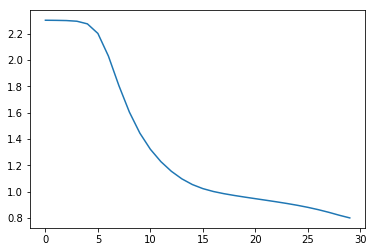

In [35]:
plt.plot(losses)

<b>Expected output</b>

Decreasing loss function.

### Accuracy

In [36]:
P, _ = nn_forward(parameters, x_train)

In [37]:
accuracy(y_train_oh, P)

0.6374666666666666

<b>Expected accuracy:</b> around 0.88 (88%)

### Test accuracy

To measure the performance of the algorithm we use a test_set

In [38]:
P, _ = nn_forward(parameters, x_test)
accuracy(y_test_oh, P)

0.6393

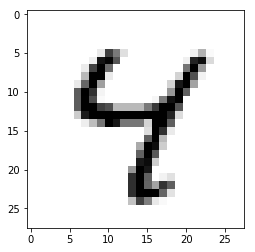

Network predicts:  9


In [39]:
i=6
visualize(x_test[i])
print("Network predicts: ", np.argmax(P[i,:]))